# Machine Learning Algorithms

This notebook provides an overview of common machine learning algorithms, their principles, and basic implementations using Python. We will cover:

1. Linear Regression
2. Logistic Regression
3. Support Vector Machine (SVM)
4. Decision Tree
5. Random Forest
6. Bayesian Learning

Let's get started!

## Libraries

We will be using the following Python libraries:

- `numpy`: For mathematical operations.
- `pandas`: For data manipulation and handling.
- `matplotlib` & `seaborn`: For visualization.
- `scikit-learn`: For implementing machine learning models.


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


### Linear Regression

Supervised learning algorithm used for regression tasks. It models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

Explanation
Linear regression fits the model:

$𝑦 = 𝛽_0 + 𝛽_1 ⋅ 𝑥$

$y=β_0 ​  + β_1 ​ x$

Where:

y is the target variable.

x is the feature.

$β_0 , 𝛽_1$  are coefficients.

### Multilinear Regression

Multilinear regression is an extension of linear regression **that involves more than one independent variable (feature)** to predict a dependent variable (target). While linear regression models a relationship between a single independent variable and a dependent variable, multilinear regression uses multiple independent variables to model the relationship.

- Can you write the formula for the multilinear regression with 3 input features $x_1, x_2, x_3$ ?


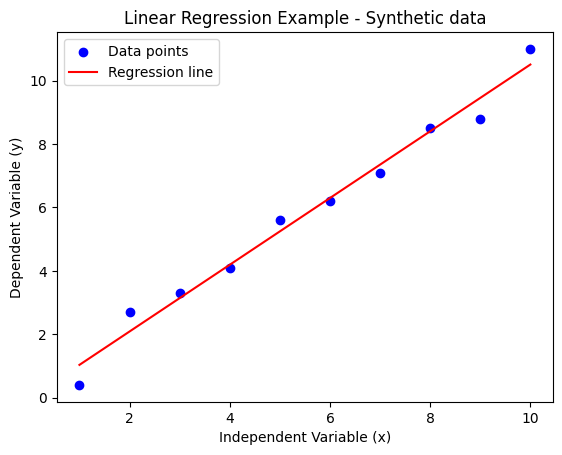

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a simple dataset
# x: independent variable, y: dependent variable
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y = np.array([0.4, 2.7, 3.3, 4.1, 5.6, 6.2, 7.1, 8.5, 8.8, 11])

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x, y)

# Predict using the model
y_pred = model.predict(x)

# Plot the data points
plt.scatter(x, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(x, y_pred, color='red', label='Regression line')

# Add labels and title
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Example - Synthetic data')

# Show legend
plt.legend()

# Show the plot
plt.show()

Learned Model Parameters:
Intercept: 2.071946937378619
Coefficients (for each feature):
MedInc: 0.8543830309268539
HouseAge: 0.12254623807840573
AveRooms: -0.29441013447330006
AveBedrms: 0.33925949059448446
Population: -0.0023077231458305397
AveOccup: -0.04082910308508754
Latitude: -0.8969288766386626
Longitude: -0.8698417752417129


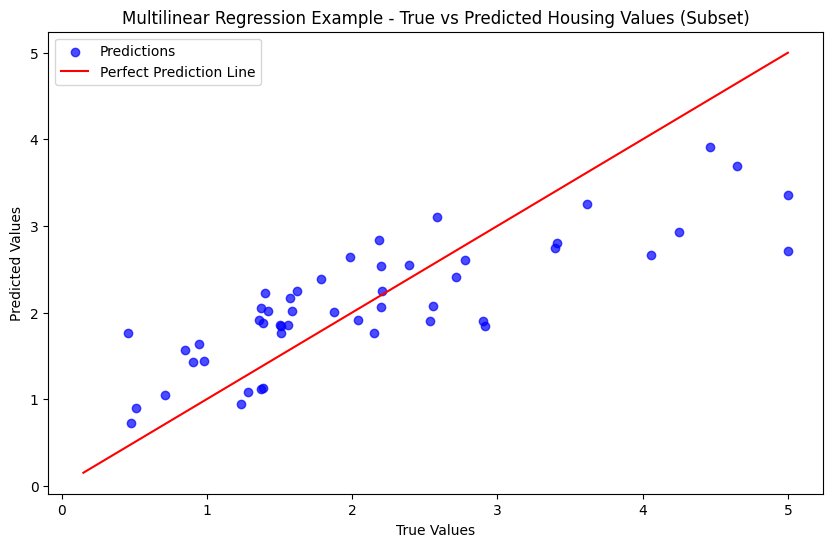

Mean Squared Error: 0.5558915986952442
R^2 Score: 0.575787706032451


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
data = fetch_california_housing()

# Extract features (X) and target (y)
X = data.data
y = data.target

# Feature names
feature_names = data.feature_names

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for models like Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Get the learned model parameters (coefficients and intercept)
coefficients = model.coef_
intercept = model.intercept_

# Print the learned parameters
print("Learned Model Parameters:")
print(f"Intercept: {intercept}")
print("Coefficients (for each feature):")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Plot the true vs predicted values (for a small subset of data)
plt.figure(figsize=(10, 6))
plt.scatter(y_test[:50], y_pred[:50], color='blue', alpha=0.7, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Multilinear Regression Example - True vs Predicted Housing Values (Subset)')
plt.legend()
plt.show()

# Optionally, you can calculate the model's performance using metrics like Mean Squared Error or R^2 score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

### Logistic Regression
Logistic regression is used for **binary classification tasks**. It estimates probabilities using a **logistic (sigmoid) function**.

Explanation
The logistic function is defined as:

$\hat{y} = \frac{1}{1+e^{−z}}$
 
Where:

z is the linear combination of input features ( $z = β_0 ​  + β_1 ​ x_1 + ...$ )


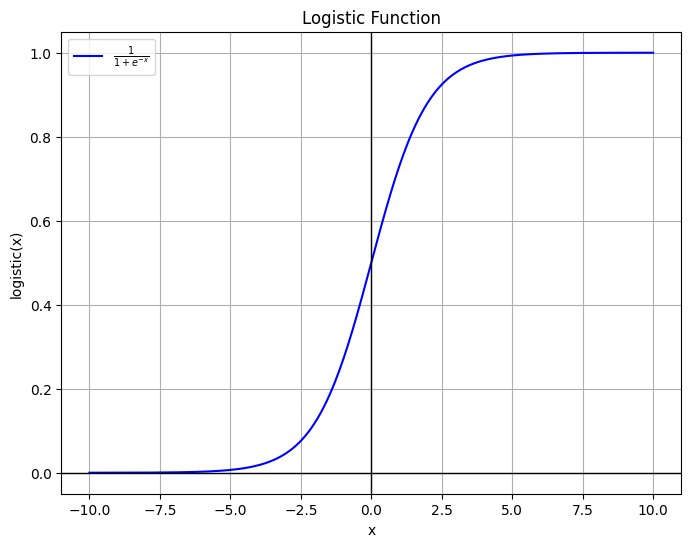

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic function
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Create an array of x values from -10 to 10
x = np.linspace(-10, 10, 400)

# Calculate the logistic function for each x value
y = logistic_function(x)

# Plot the logistic function
plt.figure(figsize=(8, 6))
plt.plot(x, y, label=r'$\frac{1}{1 + e^{-x}}$', color='b')
plt.title('Logistic Function')
plt.xlabel('x')
plt.ylabel('logistic(x)')
plt.grid(True)
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.show()

In [23]:
##Example: Classifying species in the Iris dataset

# Load dataset
data = load_iris()
X = data.data[:, 2:3]  # Selecting one feature for simplicity (petal length)
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Train logistic regression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

# Predict class labels
y_pred_logreg = logreg.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy)

Logistic Regression Accuracy: 1.0


### SVM

1. Basic Overview

SVM is a **supervised machine learning algorithm* used primarily for **classification tasks** (though it can also be used for regression). It tries to find **the best hyperplane that separates data points** from different classes.

A hyperplane is a **decision boundary** that separates different classes in the feature space. In two dimensions, this is simply a line, while in higher dimensions, it becomes a plane or hyperplane.

2. Linear SVM Classification
   
Consider a binary classification problem with two classes: Class 1 and Class 2. Suppose the data points in your feature space are linearly separable, meaning that there exists a straight line (or hyperplane) that can perfectly separate the data points of the two classes.

Finding the Optimal Hyperplane
The SVM algorithm looks for the hyperplane that separates the classes in such a way that **the margin between the classes is maximized**. This margin is defined as the **distance between the closest data points** (also known as support vectors) and the hyperplane. By maximizing the margin, SVM ensures that the **model generalizes well to unseen data**.

Mathematically, we can express the hyperplane in the following form:

$\mathbf{w^{T}x}+b=0$

Where:

$\mathbf{w}$ is the weight vector (normal vector to the hyperplane).

$\mathbf{x}$ is a data point.

b is the bias term.



Accuracy: 80.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



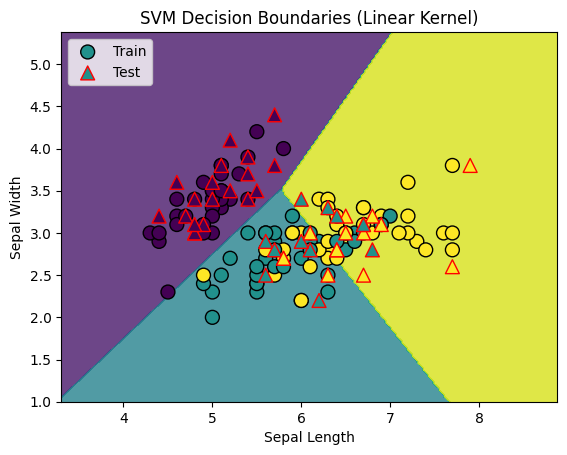

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Support Vector Classifier (SVM)
svm = SVC(kernel='linear')  # Linear Kernel for simplicity

# Train the SVM model
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the decision boundaries
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for each point in the mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and the training points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=100, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='r', marker='^', s=100, label='Test')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundaries (Linear Kernel)')
plt.legend(loc='upper left')
plt.show()

### Bayesian Learning (Naive Bayes)
Bayesian learning is based on Bayes' theorem and is used for classification tasks. The Naive Bayes classifier assumes independence between features.

Explanation
Bayes' theorem is given by:

$𝑃(𝐶∣𝑋) = \frac{𝑃(𝑋∣𝐶)⋅𝑃(𝐶)}{𝑃(𝑋)}$
 
Where:

$𝑃(𝐶∣𝑋)$ is the posterior probability.

$P(X∣C)$ is the likelihood.

$P(C)$ is the prior probability.

$P(X)$ is the evidence.


In [26]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict class labels
y_pred_nb = nb_model.predict(X_test)

# Evaluate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

Naive Bayes Accuracy: 0.8222222222222222


### Decision Tree

A decision tree is a supervised learning algorithm that splits data into subsets based on feature values. It creates a tree-like structure for decision-making.

A decision tree makes decisions by splitting the feature space and using criteria such as Gini impurity or entropy.



In [29]:
# Train decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Predict class labels
y_pred_tree = tree_model.predict(X_test)

# Evaluate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

Decision Tree Accuracy: 0.6666666666666666


### Random Forest

Random forest is an ensemble method that constructs multiple decision trees and aggregates their predictions.

The random forest algorithm creates multiple decision trees, each trained on a subset of the data. It then uses majority voting (for classification) or averaging (for regression) to make predictions.



In [30]:
# Train random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict class labels
y_pred_rf = rf_model.predict(X_test)

# Evaluate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.7555555555555555


### Deep Learning

#### Densely connected network

Also known as a Fully Connected Network or Dense Neural Network, 

A type of neural network where each neuron in one layer is connected to every neuron in the next layer. These types of networks are often used for tasks like classification, regression, or feature extraction.

#### Basic Structure of a Dense Neural Network:

- Input Layer: Takes the input data.
    
- Hidden Layers: Layers of neurons where each neuron is connected to every neuron in the next layer.
    
- Output Layer: Produces the final output of the network.


In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 2: Preprocess the data
# We will normalize the feature values using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target labels (3 classes in the Iris dataset)
y_encoded = to_categorical(y, 3)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Step 3: Create the Dense Neural Network model
model = Sequential()

# Input layer (4 input features in the Iris dataset)
model.add(Dense(units=64, activation='relu', input_dim=4))

# First hidden layer (fully connected to the previous layer)
model.add(Dense(units=64, activation='relu'))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer (3 output classes for classification)
model.add(Dense(units=3, activation='softmax'))

# Step 4: Compile the model
model.compile(loss='categorical_crossentropy',  # For multi-class classification
              optimizer='adam',  # Adam optimizer
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train, epochs=50, batch_size=5, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy[1] * 100:.2f}%")


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
from keras.utils import plot_model

# Plot the model architecture
plot_model(model, to_file='dense_nn_model.png', show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'tensorflow'